## Keras

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               1179776   
_______________________________________________

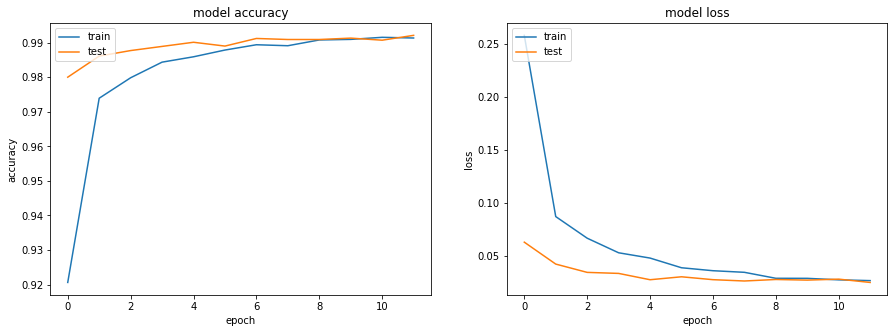

Test loss: 0.025033414738834473
Test accuracy: 0.9921000003814697


In [5]:
'''Trains a simple convnet on the MNIST dataset.

Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

History = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)

#Plot Loss and accuracy
import matplotlib.pyplot as plt
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.show()

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 24, 24, 6)         156       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)               30840     
_________________________________________________________________
dense_4 (Dense)              (None, 84)               

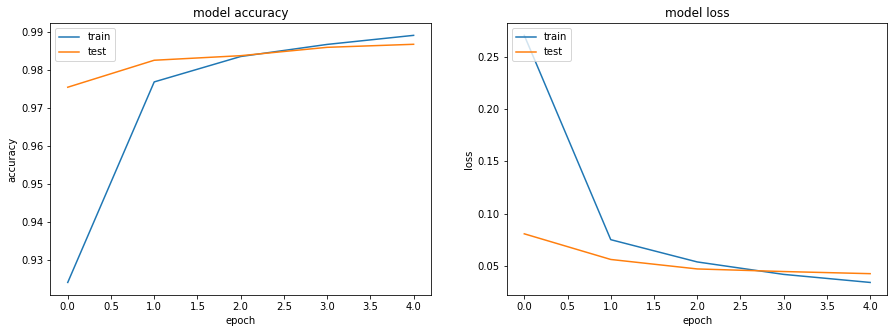

In [2]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import Adam

#load the MNIST dataset from keras datasets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#Process data
X_train = X_train.reshape(-1, 28, 28, 1) # Expend dimension for 1 cahnnel image
X_test = X_test.reshape(-1, 28, 28, 1)  # Expend dimension for 1 cahnnel image
X_train = X_train / 255 # Normalize
X_test = X_test / 255 # Normalize

#One hot encoding
y_train = np_utils.to_categorical(y_train, num_classes=10)
y_test = np_utils.to_categorical(y_test, num_classes=10)

#Build LetNet model with Keras
def LetNet(width, height, depth, classes):
    # initialize the model
    model = Sequential()

    # first layer, convolution and pooling
    model.add(Conv2D(input_shape=(width, height, depth), kernel_size=(5, 5), filters=6, strides=(1,1), activation='tanh'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # second layer, convolution and pooling
    model.add(Conv2D(input_shape=(width, height, depth), kernel_size=(5, 5), filters=16, strides=(1,1), activation='tanh'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # Fully connection layer
    model.add(Flatten())
    model.add(Dense(120,activation = 'tanh'))
    model.add(Dense(84,activation = 'tanh'))

    # softmax classifier
    model.add(Dense(classes))
    model.add(Activation("softmax"))

    return model

LetNet_model = LetNet(28,28,1,10)
LetNet_model.summary()
LetNet_model.compile(optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08),loss = 'categorical_crossentropy',metrics=['accuracy'])

#Strat training
History = LetNet_model.fit(X_train, y_train, epochs=5, batch_size=128,validation_data=(X_test, y_test))

#Plot Loss and accuracy
import matplotlib.pyplot as plt
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.show()

## Tensorflow 2.0

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 40us/sample - loss: 0.4031 - acc: 0.8848 - val_loss: 0.1938 - val_acc: 0.9429
Epoch 2/5
60000/60000 [==============================] - 2s 

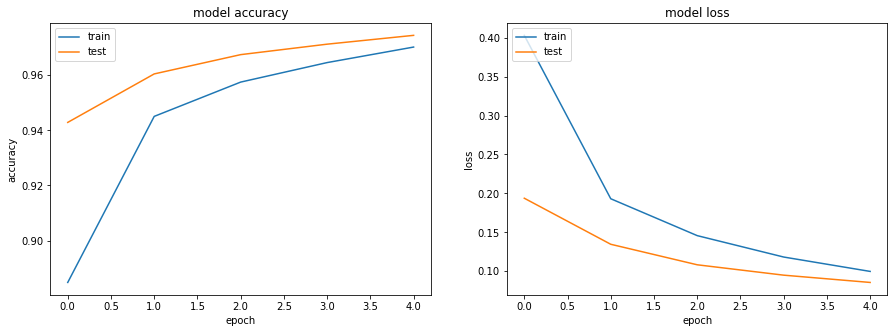

In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals

# Install TensorFlow
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf


mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

History = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_test, y_test))

model.evaluate(x_test,  y_test, verbose=2)

#Plot Loss and accuracy
import matplotlib.pyplot as plt
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.plot(History.history['acc'])
plt.plot(History.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.show()

## Pytorch

In [6]:
import torch  
import torch.nn as nn  
from torch.autograd import Variable  
import torch.utils.data as Data  
import torchvision  
import time
from torchsummary import summary
#import matplotlib.pyplot as plt  
  
torch.manual_seed(1)  
  
EPOCH = 2  
BATCH_SIZE = 50  
LR = 0.001  
DOWNLOAD_MNIST = True  
if_use_gpu = 1
  
# 獲取訓練集dataset  
training_data = torchvision.datasets.MNIST(  
             root='./mnist/', # dataset儲存路徑  
             train=True, # True表示是train訓練集，False表示test測試集  
             transform=torchvision.transforms.ToTensor(), # 將原資料規範化到（0,1）區間  
             download=DOWNLOAD_MNIST,  
             )  
  
# 列印MNIST資料集的訓練集及測試集的尺寸  
print(training_data.train_data.size())  
print(training_data.train_labels.size())  
# torch.Size([60000, 28, 28])  
# torch.Size([60000])  
  
#plt.imshow(training_data.train_data[0].numpy(), cmap='gray')  
#plt.title('%i' % training_data.train_labels[0])  
#plt.show()  
  
# 通過torchvision.datasets獲取的dataset格式可直接可置於DataLoader  
train_loader = Data.DataLoader(dataset=training_data, batch_size=BATCH_SIZE,  
                               shuffle=True)  
  
# 獲取測試集dataset  

test_data = torchvision.datasets.MNIST(  
             root='./mnist/', # dataset儲存路徑  
             train=False, # True表示是train訓練集，False表示test測試集  
             transform=torchvision.transforms.ToTensor(), # 將原資料規範化到（0,1）區間  
             download=DOWNLOAD_MNIST,  
             )  
# 取前全部10000個測試集樣本  
test_x = Variable(torch.unsqueeze(test_data.test_data, dim=1).float(), requires_grad=False)
#test_x = test_x.cuda()
## (~, 28, 28) to (~, 1, 28, 28), in range(0,1)  
test_y = test_data.test_labels
#test_y = test_y.cuda()  
class CNN(nn.Module):  
    def __init__(self):  
        super(CNN, self).__init__()  
        self.conv1 = nn.Sequential( # (1,28,28)  
                     nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5,  
                               stride=1, padding=2), # (16,28,28)  
        # 想要con2d卷積出來的圖片尺寸沒有變化, padding=(kernel_size-1)/2  
                     nn.ReLU(),  
                     nn.MaxPool2d(kernel_size=2) # (16,14,14)  
                     )  
        self.conv2 = nn.Sequential( # (16,14,14)  
                     nn.Conv2d(16, 32, 5, 1, 2), # (32,14,14)  
                     nn.ReLU(),  
                     nn.MaxPool2d(2) # (32,7,7)  
                     )  
        self.out = nn.Linear(32*7*7, 10)  
  
    def forward(self, x):  
        x = self.conv1(x)  
        x = self.conv2(x)  
        x = x.view(x.size(0), -1) # 將（batch，32,7,7）展平為（batch，32*7*7）  
        output = self.out(x)  
        return output  
  
cnn = CNN()  
if if_use_gpu:
    cnn = cnn.cuda()

optimizer = torch.optim.Adam(cnn.parameters(), lr=LR)  
loss_function = nn.CrossEntropyLoss()  
 
summary(cnn, (1, 28, 28))

for epoch in range(EPOCH):  
    start = time.time() 
    for step, (x, y) in enumerate(train_loader):  
        b_x = Variable(x, requires_grad=False) 
        b_y = Variable(y, requires_grad=False)  
        if if_use_gpu:
            b_x = b_x.cuda()
            b_y = b_y.cuda()
  
        output = cnn(b_x)  
        loss = loss_function(output, b_y)  
        optimizer.zero_grad()  
        loss.backward()  
        optimizer.step()  
  
        if step % 100 == 0:  
            print('Epoch:', epoch, '|Step:', step,  
                  '|train loss:%.4f'%loss.data)  
    duration = time.time() - start 
    print('Training duation: %.4f'%duration)
    
cnn = cnn.cpu()
test_output = cnn(test_x)  
pred_y = torch.max(test_output, 1)[1].data.squeeze()
accuracy = sum(pred_y == test_y) / test_y.size(0) 
print('Test Acc: %.4f'%accuracy)

torch.Size([60000, 28, 28])
torch.Size([60000])


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


RuntimeError: CUDA error: out of memory